In [2]:
!pip install pandas
!pip install sklearn
!pip install scikit-learn
!pip install torch
!pip install matplotlib

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Step 1: Load data
df = pd.read_csv('./used_cars.csv')

In [4]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [5]:
# Clean 'price' and 'milage' columns
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['milage'] = df['milage'].str.replace(',', '').str.replace(' mi.', '').astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\will3\AppData\Local\Temp\ipykernel_5508\3123952599.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [6]:
# Drop less useful columns
df = df.drop(columns=['model', 'engine', 'clean_title', 'ext_col', 'int_col'])

In [7]:
# Separate target and features
target_col = 'price'
X = df.drop(columns=[target_col])
y = df[target_col]

In [8]:
# Define feature types
numerical_features = ['model_year', 'milage']
categorical_features = X.select_dtypes(include='object').columns.tolist()

In [9]:

# Pipelines for preprocessing
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [10]:
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [11]:
# Fit and transform
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

In [12]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_processed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val_processed, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_processed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [13]:
# Print shapes to confirm
print(f"Train: {X_train_tensor.shape}, Val: {X_val_tensor.shape}, Test: {X_test_tensor.shape}")

Train: torch.Size([2806, 127]), Val: torch.Size([601, 127]), Test: torch.Size([602, 127])



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\will3\Documents\sfsu\CSC 671\project\.venv\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 54.59679| val_mae: 5.29561 | val_mse: 29.24601|  0:00:01s
epoch 1  | loss: 21.41466| val_mae: 2.5077  | val_mse: 7.20189 |  0:00:02s
epoch 2  | loss: 11.39574| val_mae: 2.12474 | val_mse: 5.34629 |  0:00:03s
epoch 3  | loss: 5.28591 | val_mae: 0.82291 | val_mse: 1.04448 |  0:00:04s
epoch 4  | loss: 3.56724 | val_mae: 0.71276 | val_mse: 0.82754 |  0:00:06s
epoch 5  | loss: 2.89948 | val_mae: 0.94587 | val_mse: 1.31956 |  0:00:07s
epoch 6  | loss: 2.264   | val_mae: 0.99046 | val_mse: 1.38167 |  0:00:09s
epoch 7  | loss: 1.77445 | val_mae: 0.73548 | val_mse: 0.81153 |  0:00:12s
epoch 8  | loss: 1.43083 | val_mae: 0.5367  | val_mse: 0.47389 |  0:00:14s
epoch 9  | loss: 1.47483 | val_mae: 1.01772 | val_mse: 1.36194 |  0:00:17s
epoch 10 | loss: 1.14522 | val_mae: 0.94923 | val_mse: 1.20804 |  0:00:19s
epoch 11 | loss: 1.05715 | val_mae: 0.58019 | val_mse: 0.5397  |  0:00:22s
epoch 12 | loss: 1.8901  | val_mae: 1.90014 | val_mse: 4.11236 |  0:00:25s
epoch 13 | loss: 1.94471 

c:\Users\will3\Documents\sfsu\CSC 671\project\.venv\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


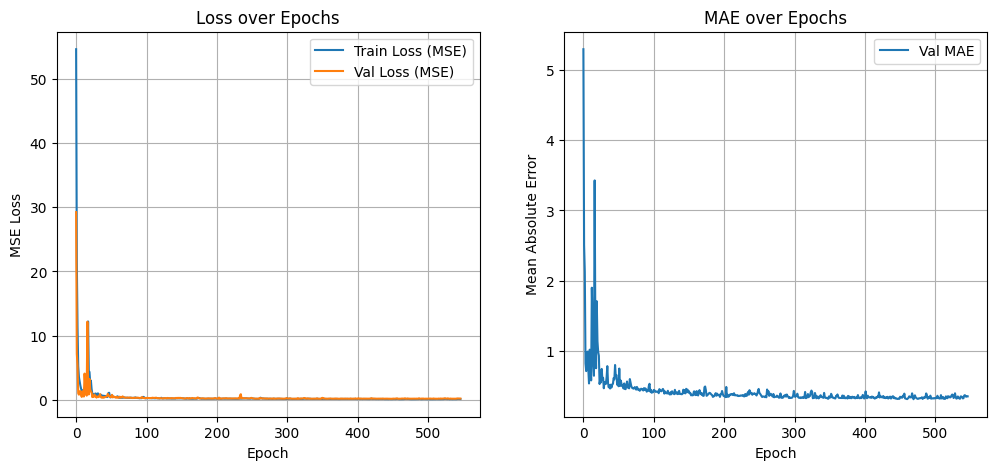

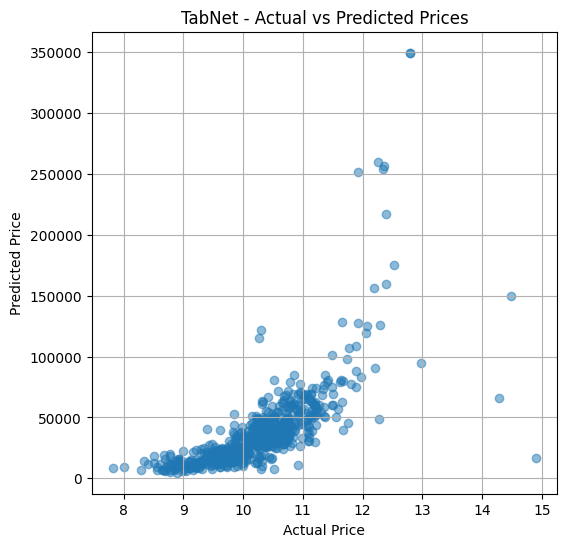

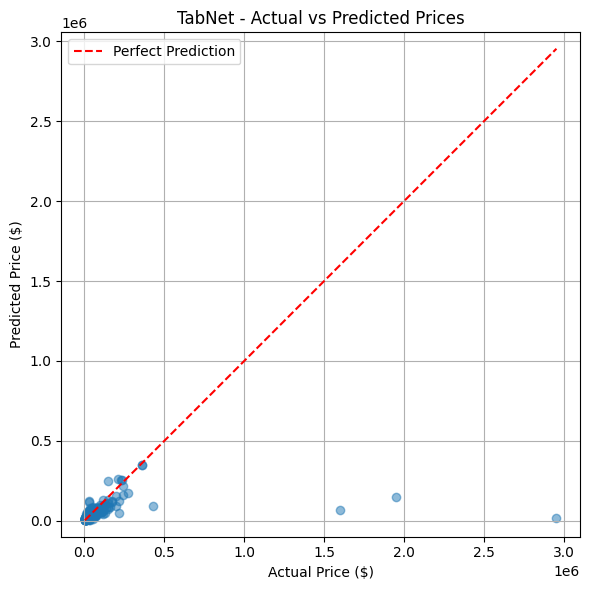

In [ ]:
# Install TabNet library (run once)
!pip install pytorch-tabnet

from pytorch_tabnet.tab_model import TabNetRegressor
import torch
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Ensure correct data type
X_train_np = X_train_processed.astype(np.float32)
X_val_np = X_val_processed.astype(np.float32)
X_test_np = X_test_processed.astype(np.float32)
# y_train_np = y_train.values.reshape(-1, 1).astype(np.float32)
# y_val_np = y_val.values.reshape(-1, 1).astype(np.float32)
# y_test_np = y_test.values.reshape(-1, 1).astype(np.float32)

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

# Define TabNet Regressor
tabnet_model = TabNetRegressor(
    n_d=32, n_a=32,
    n_steps=7,
    gamma=1.5,
    n_independent=3,
    n_shared=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":50, "gamma":0.95},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax'
)

# Train TabNet with both metrics
tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_log.values.reshape(-1, 1),
    eval_set=[(X_val_np, y_val_log.values.reshape(-1, 1))],
    eval_name=["val"],
    eval_metric=["mae", "mse"],
    max_epochs=1000,
    patience=100,
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)



preds_log = tabnet_model.predict(X_test_np).reshape(-1)
preds = np.expm1(preds_log)  # Inverse of log1p

# Plot MSE and MAE over epochs using available history keys
plt.figure(figsize=(12, 5))

# Subplot 1: MSE Loss
plt.subplot(1, 2, 1)
plt.plot(tabnet_model.history['loss'], label='Train Loss (MSE)')
plt.plot(tabnet_model.history['val_mse'], label='Val Loss (MSE)')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)

# Subplot 2: MAE
plt.subplot(1, 2, 2)
plt.plot(tabnet_model.history['val_mae'], label='Val MAE')  # No train_mae available
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.title("MAE over Epochs")
plt.legend()
plt.grid(True)







<h1>Model TabNet</h1>

MAE (dollars): $28,621
MSE (dollars²): 25,338,211,441
R² score: 0.026


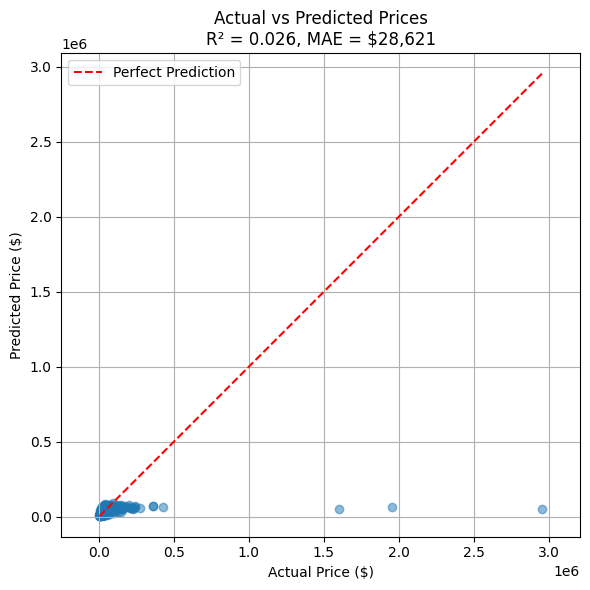

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# ======= Predict and inverse-transform =======
preds_log = tabnet_model.predict(X_test_np).reshape(-1)
preds_raw = np.expm1(preds_log)  # Convert back to actual price scale

# ======= Evaluate on real dollar scale =======
mae_dollars = mean_absolute_error(y_test, preds_raw)
mse_dollars = mean_squared_error(y_test, preds_raw)
r2 = r2_score(y_test, preds_raw)

print(f"MAE (dollars): ${mae_dollars:,.0f}")
print(f"MSE (dollars²): {mse_dollars:,.0f}")
print(f"R² score: {r2:.3f}")

# ======= Plot Actual vs Predicted =======
plt.figure(figsize=(6, 6))
plt.scatter(y_test, preds_raw, alpha=0.5)

# Perfect prediction line
min_val = min(y_test.min(), preds_raw.min())
max_val = max(y_test.max(), preds_raw.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction")

# Labels and formatting
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title(f"Actual vs Predicted Prices\nR² = {r2:.3f}, MAE = ${mae_dollars:,.0f}")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.tight_layout()
plt.show()